In [23]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
import pickle
import statistics
from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from PIL import Image
plt.rcParams['figure.dpi'] = 200

In [53]:
#directory = "/Volumes/Flash/acc40/"
directory = "/Users/davidnull/Desktop/Acc40_Visual_Servo_r1"

In [54]:
def get_end_rmse(directory):
    for filename in glob.glob(directory + "*.csv"):
        data_arr = filename.split("/")[-1].split(".")[0].split("_")
        targ = (float(data_arr[-2]), float(data_arr[-1]))
        df = pd.read_csv(filename)
        end_targ = (round(df["M10X"].iloc[-1], 3), round(df["M10Y"].iloc[-1], 3))
        rms = round(mean_squared_error(targ, end_targ, squared=False),3)
        print("Goal: " + str(targ) + ", Actual: " + str(end_targ) + ", RMSE: " + str(rms) + " cm")
        return targ, end_targ, rms

In [55]:
data = {}
for targ_dir in glob.glob(directory + "/*"):
    targ_vs, end_targ_vs, rms_vs = get_end_rmse(targ_dir + "/")
    data[targ_vs] = {
        "targ": targ_vs,
        "vs_end": end_targ_vs,
        "vs_rms": rms_vs,
    }

pickle.dump( data, open( "/Users/davidnull/Desktop/acc40_visual_servo_analysis/vs_end_data.p", "wb" ) )
df = pd.DataFrame(data).T.reset_index().rename(columns={"level_0": "x", "level_1": "y"})
df.to_csv("/Users/davidnull/Desktop/acc40_visual_servo_analysis/vs_end_data.csv")

Goal: (-7.0, 25.0), Actual: (-8.853, 25.515), RMSE: 1.36 cm
Goal: (-1.0, 33.0), Actual: (-2.244, 33.892), RMSE: 1.082 cm
Goal: (7.0, 25.0), Actual: (7.077, 25.759), RMSE: 0.539 cm
Goal: (-5.0, 31.0), Actual: (-6.383, 31.01), RMSE: 0.978 cm
Goal: (-1.0, 25.0), Actual: (-0.695, 25.551), RMSE: 0.445 cm
Goal: (5.0, 25.0), Actual: (5.107, 26.334), RMSE: 0.946 cm
Goal: (9.0, 25.0), Actual: (9.501, 26.067), RMSE: 0.834 cm
Goal: (-3.0, 27.0), Actual: (-4.899, 26.897), RMSE: 1.345 cm
Goal: (5.0, 29.0), Actual: (7.289, 28.017), RMSE: 1.762 cm
Goal: (1.0, 35.0), Actual: (2.327, 36.482), RMSE: 1.407 cm
Goal: (-9.0, 27.0), Actual: (-10.394, 26.014), RMSE: 1.207 cm
Goal: (-3.0, 33.0), Actual: (-4.847, 34.539), RMSE: 1.7 cm
Goal: (1.0, 29.0), Actual: (1.114, 29.017), RMSE: 0.082 cm
Goal: (-3.0, 31.0), Actual: (-5.59, 31.029), RMSE: 1.832 cm
Goal: (-1.0, 31.0), Actual: (-2.565, 31.442), RMSE: 1.15 cm
Goal: (-1.0, 35.0), Actual: (-2.556, 36.157), RMSE: 1.371 cm
Goal: (-9.0, 25.0), Actual: (-9.697, 24.8

In [56]:
# data = {}
# for targ_dir in glob.glob(directory + "/*"):
#     if targ_dir.split("/")[-1].isnumeric():
#         ampc_dir = targ_dir + "/ampc_comb/run0/"
#         simple_dir = targ_dir + "/simple_comb/run0/"
#         print("AMPC Controller")
#         targ_ampc, end_targ_ampc, rms_ampc = get_end_rmse(ampc_dir)
#         print("Simple Controller")
#         targ_simp, end_targ_simp, rms_simp = get_end_rmse(simple_dir)
#         data[targ_ampc] = {
#             "targ": targ_ampc,
#             "ampc_end": end_targ_ampc,
#             "simp_end": end_targ_simp,
#             "ampc_rms": rms_ampc,
#             "simp_rms": rms_simp,
#             "rms_diff": rms_ampc-rms_simp
#         }
# pickle.dump( data, open( "/Volumes/Flash/acc40/analysis/end_data.p", "wb" ) )
# df = pd.DataFrame(data).T.reset_index().rename(columns={"level_0": "x", "level_1": "y"})
# df.to_csv("/Volumes/Flash/acc40/analysis/end_data.csv")

In [58]:
# end_data_file = "/Users/davidnull/phd/softrobotics/acc40_data/end_data.p"
end_data_file = "/Users/davidnull/Desktop/acc40_visual_servo_analysis/vs_end_data.p"
end_data = pickle.load( open( end_data_file, "rb" ) )

In [59]:
levels = 256
viridis = cm.get_cmap('viridis', levels)
abs_max_rms = 4.635
max_rms = 3.5
min_rms = 0.0
scaler = abs_max_rms/max_rms
newcolors = viridis(np.linspace(0, scaler, levels))
cmap = ListedColormap(newcolors)

def get_rectangle(targ, rms):
    edge_len = 2
    half_edge = edge_len / 2
    x = targ[0] - half_edge
    y = targ[1] - half_edge
    norm_rms = (rms - min_rms) / (max_rms - min_rms)
    color = viridis(norm_rms)
    rect = patches.Rectangle((x, y), edge_len, edge_len, color=color)
    return rect

Ave Simp-> 1.702
Ave AMPC-> 0.424
Ave VS -> 0.9773

stdev Simp-> 0.999
stdev ampc-> 0.452
stdev vs -> 0.5399

75.088% better

Color map 0-0.034-4.635

0.9772999999999996
0.5331415478088347


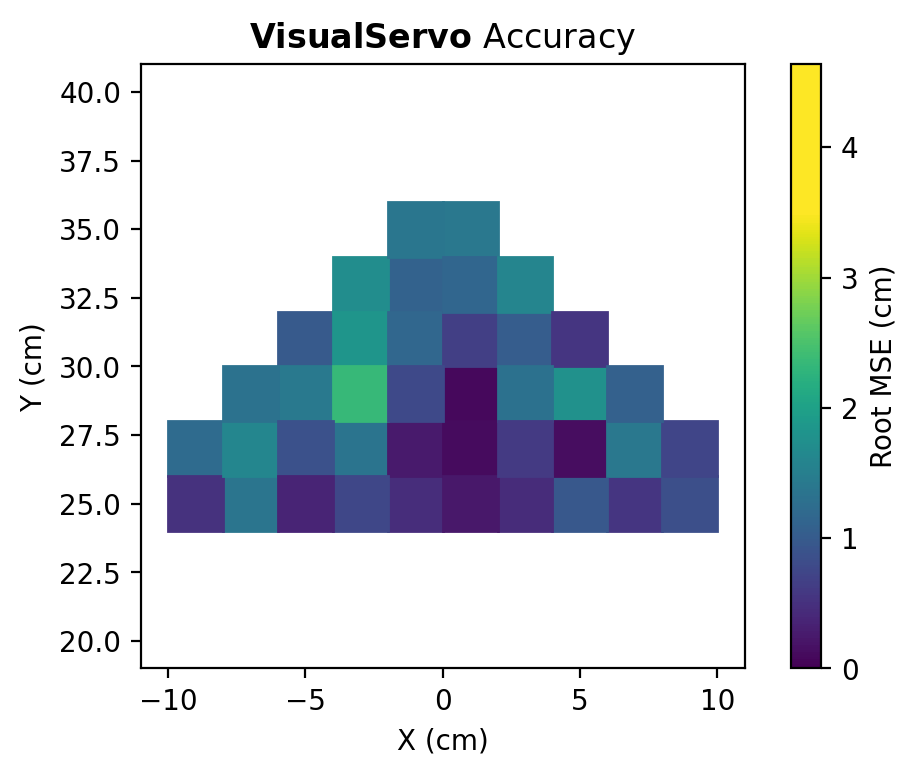

In [60]:
fig, ax = plt.subplots()

#0 - simp, 1 = ampc, vs = 2
e = 2
if e == 0:
    ax.set_title(r"$\bf{Open}$ $\bf{Loop}$ $\bf{Learned}$ $\bf{Inverse}$ $\bf{Kinematics}$ Accuracy")
    ax.set(adjustable='box', aspect='equal')
    simp_data_label = "simp_rms"
elif e == 1:
    ax.set_title(r"$\bf{AutoMPC}$ Accuracy")
    ampc_data_label = "ampc_rms"
    ax.set(adjustable="box", aspect='equal')
elif e == 2:
    ax.set_title(r"$\bf{Visual Servo}$ Accuracy")
    vs_data_label = "vs_rms"
    ax.set(adjustable="box", aspect='equal')


average = 0
stdev_list = []
for key in end_data.keys():
    if e == 0:
        rect_simp = get_rectangle(key, end_data[key][simp_data_label])
        ax.add_patch(rect_simp)
        average += end_data[key][simp_data_label]
        stdev_list.append(end_data[key][simp_data_label])
        
    elif e == 1:
        rect_ampc = get_rectangle(key, end_data[key][ampc_data_label])
        ax.add_patch(rect_ampc)
        average += end_data[key][ampc_data_label]
        stdev_list.append(end_data[key][ampc_data_label])
    elif e == 2:
        rect_vs = get_rectangle(key, end_data[key][vs_data_label])
        ax.add_patch(rect_vs)
        average += end_data[key][vs_data_label]
        stdev_list.append(end_data[key][vs_data_label])
average = average / len(end_data)
print(average)
stdev = statistics.pstdev(stdev_list)
print(stdev)
    

ax.set_ylim((19,41))
ax.set_xlim((-11,11))
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
norm = Normalize(vmin=0, vmax=abs_max_rms, clip=False)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Root MSE (cm)')

if e == 0:
    plt.savefig('/Users/davidnull/phd/softrobotics/acc40_data/simp_acc40.png')
elif e == 1:
    plt.savefig('/Users/davidnull/phd/softrobotics/acc40_data/ampc_acc40.png')
elif e == 2:
    plt.savefig("/Users/davidnull/Desktop/acc40_visual_servo_analysis/vs_acc40.png")


plt.show()

In [14]:
im = Image.open('/Users/davidnull/phd/softrobotics/acc40_data/0.jpg')
all_df = pd.read_csv('/Users/davidnull/phd/softrobotics/acc40_data/all_df_combined.csv')

x_data = all_df["M10X"]
y_data = all_df["M10Y"]

In [15]:
print(len(x_data))

11358


In [14]:
train_count = {}
for x in range(-21,21,2):
    for y in range(19, 41,2):
        train_count[(x,y)] = 0
half_side = 1
for i in range(len(x_data)):
    x = x_data.iloc[i]
    y = y_data.iloc[i]  
    for key in train_count.keys():
        xu = key[0] + half_side
        xl = key[0] - half_side
        yu = key[1] + half_side
        yl = key[1] - half_side
        if (x < xu and x > xl and y < yu and y > yl):
            train_count[key] += 1
    

In [343]:
#pickle.dump( train_count, open( "/Volumes/Flash/acc40/analysis/train_count.p", "wb" ) )

In [25]:
levels = 256
viridis_train = cm.get_cmap('copper', levels)
max_count = 250
min_count = 0
abs_max_count = 850
scaler = abs_max_count/max_count
newcolors_train = viridis_train(np.linspace(0, scaler, levels))
cmap_train = ListedColormap(newcolors_train)
half_side = 1

newcameramtx = np.array([
    [1559.8905, 0, 942.619458],
    [0, 1544.98389, 543.694259],
    [0,0,1]
])
camera_to_markers_dist = 57.055

def world2pix(x, y):
    coord_3d = np.array([[float(x) / camera_to_markers_dist],
                         [float(y) / camera_to_markers_dist],
                         [1.0]])
    coord_2d = np.matmul(newcameramtx, coord_3d)
    return coord_2d[0][0], coord_2d[1][0]
    
def draw_rectangle(img, loc, count):
    if count == 0:
        return img
    xr = loc[0] + half_side
    xl = loc[0] - half_side
    yt = loc[1] + half_side
    yb = loc[1] - half_side
    
    coord_2d_p1 = world2pix(xl, yt)
    coord_2d_p2 = world2pix(xr, yb)
    
    p1 = (int(coord_2d_p1[0]), 1080-(int(coord_2d_p1[1])-489))
    p2 = (int(coord_2d_p2[0]), 1080-(int(coord_2d_p2[1])-489))
    norm_count = (count - min_count) / (max_count - min_count)
    colorv = viridis_train(norm_count)
    color = (colorv[0] * 256, colorv[1] * 256, colorv[2] * 256)
    return cv2.rectangle(img,p1,p2,color,cv2.FILLED)

def draw_line(img, loc, left=False, right=False, top=False, bottom=False):
    xr = loc[0] + half_side
    xl = loc[0] - half_side
    yt = loc[1] + half_side
    yb = loc[1] - half_side
    
    if left:
        coord_2d_p1 = world2pix(xl, yt)
        coord_2d_p2 = world2pix(xl, yb)
    elif right:
        coord_2d_p1 = world2pix(xr, yt)
        coord_2d_p2 = world2pix(xr, yb)
    elif top:
        coord_2d_p1 = world2pix(xl, yt)
        coord_2d_p2 = world2pix(xr, yt)
    elif bottom:
        coord_2d_p1 = world2pix(xl, yb)
        coord_2d_p2 = world2pix(xr, yb)
    else:
        coord_2d_p1 = 0
        coord_2d_p2 = 0
    
    p1 = (int(coord_2d_p1[0]), 1080-(int(coord_2d_p1[1])-489))
    p2 = (int(coord_2d_p2[0]), 1080-(int(coord_2d_p2[1])-489))
    return cv2.line(img,p1,p2,(255,0,0),5)

In [26]:
img = cv2.imread('/Users/davidnull/phd/softrobotics/acc40_data/0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
for key in train_count.keys():
    img = draw_rectangle(img, key, train_count[key])

(1080, 1920, 3)


In [27]:
lb = [(-9,25),(-9,27),(-7,29),(-5,31),(-3,33),(-1,35)]
rb = [(9,25),(9,27),(7,29),(5,31),(3,33),(1,35)]
tb = [(-9,27),(-7,29),(-5,31),(-3,33),(-1,35),(9,27),(7,29),(5,31),(3,33),(1,35)]
bb = [(-9,25),(-7,25),(-5,25),(-3,25),(-1,25),(1,25),(3,25),(5,25),(7,25),(9,25)]
for loc in lb:
    img = draw_line(img, loc, left=True)
for loc in rb:
    img = draw_line(img, loc, right=True)
for loc in tb:
    img = draw_line(img, loc, top=True)
for loc in bb:
    img = draw_line(img, loc, bottom=True)

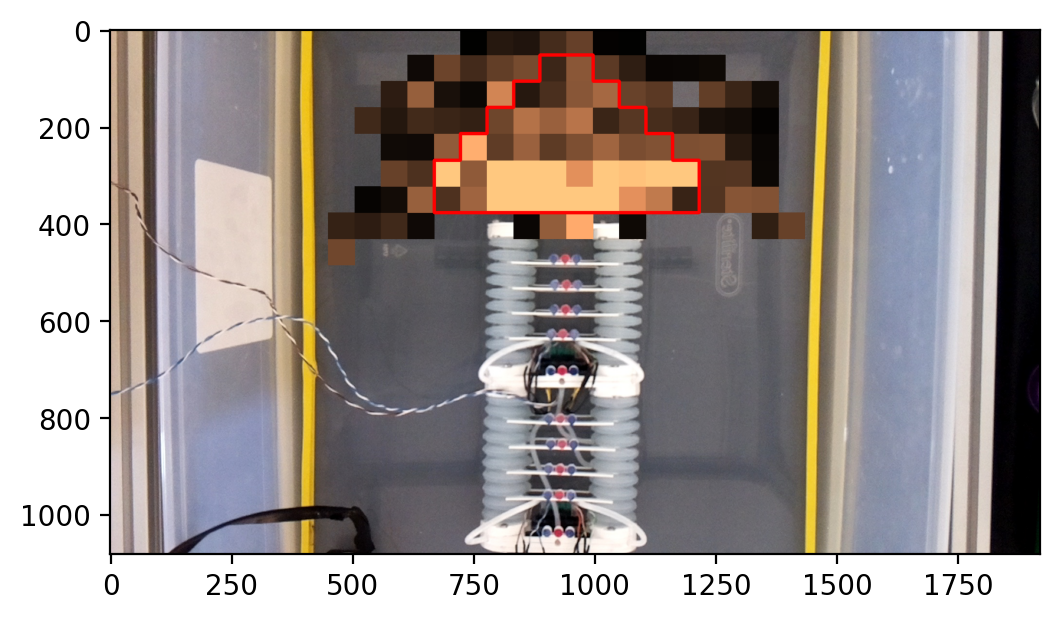

In [28]:
plt.imshow(img)

In [29]:
final_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('/Users/davidnull/phd/softrobotics/acc40_data/combined_data_visual.png', final_img)

True

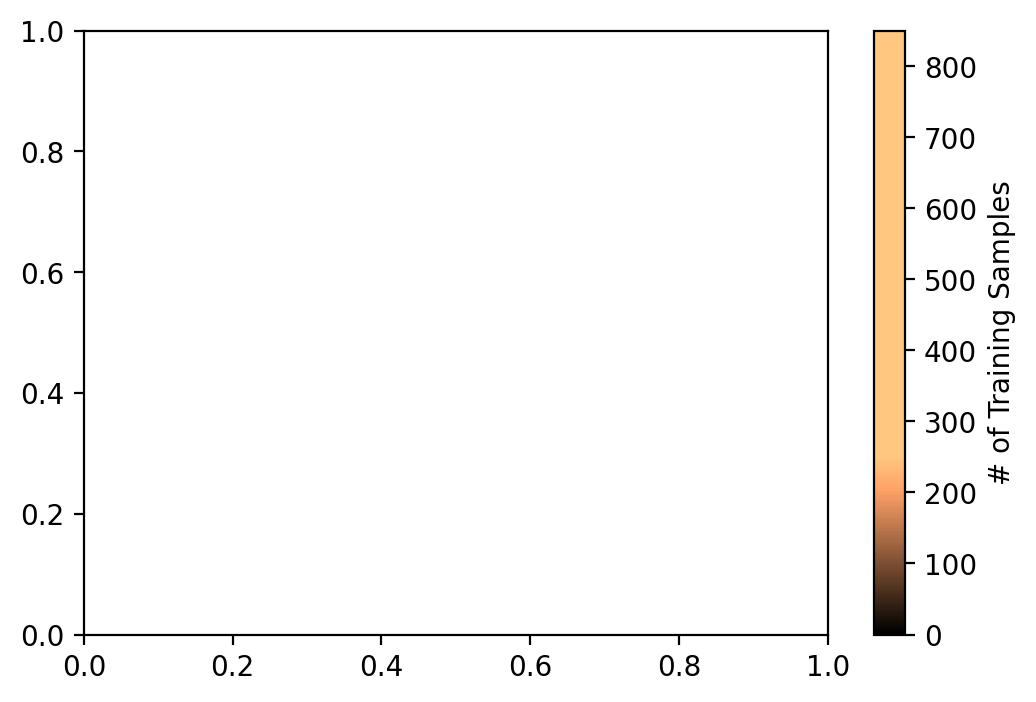

In [30]:
fig_new, ax_new = plt.subplots()
norm = Normalize(vmin=0, vmax=abs_max_count, clip=False)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_train), ax=ax_new)
cbar.set_label('# of Training Samples')
plt.savefig('/Users/davidnull/phd/softrobotics/acc40_data/combined_data_visual_cbar.png')
plt.show()

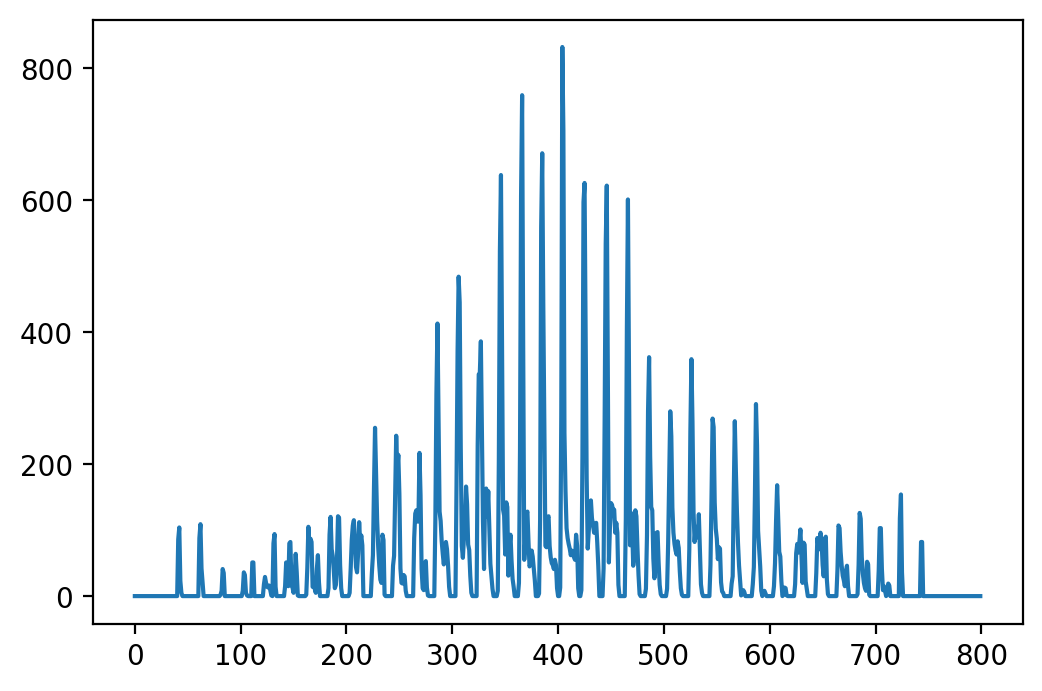

In [171]:
d = []
for key in train_count.keys():
    d.append(train_count[key])
plt.plot(d)
